# LTEM simulations

## Some test for rewriting functions to use `df.Field` whenever possible

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(1)
#np.random.seed(1)

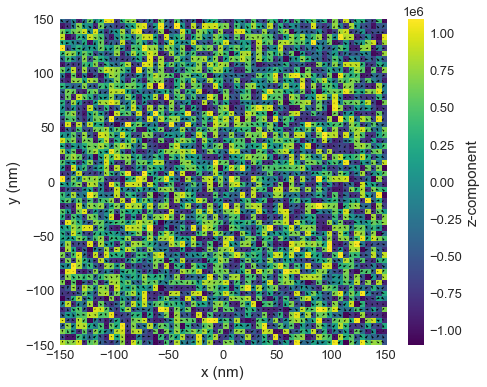

In [3]:
region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 20e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='T') 
                 + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, 2e5)))

Ms = 1.1e6

def m_fun(pos):
    return [2*random.random()-1 for i in range(3)]
    # return 2 * np.random.rand(3) - 1

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane('z').mpl()

Running OOMMF (ExeOOMMFRunner) [2021/06/09 14:38]... (13.6 s)


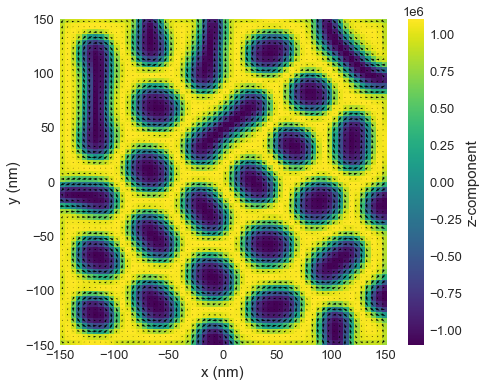

In [4]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [5]:
mz_projection = system.m.project('z')

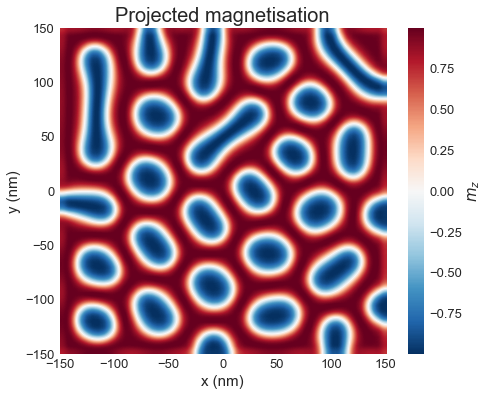

In [6]:
fig, ax = plt.subplots()
mz_projection.orientation.z.mpl_scalar(ax=ax,
                                       cmap='RdBu_r',
                                       interpolation='spline16',
                                       colorbar_label=r'$m_z$')
ax.set_title('Projected magnetisation');

## Simulate LTEM

In [7]:
import exsim

In [8]:
phase, ft_phase = exsim.ltem_phase(system.m, U=300e3, Cs=8000)

The electron beam has a wavelength of 1.97e-03 nm.


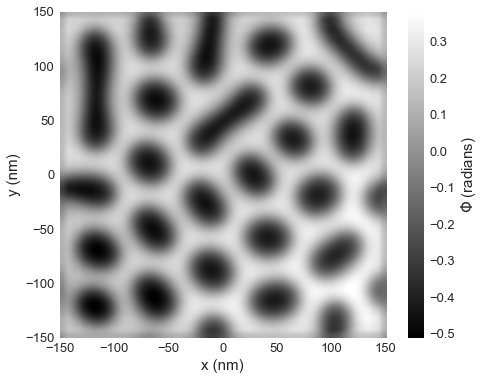

In [9]:
phase.mpl_scalar(cmap='gray',
                   interpolation='spline16',
                   colorbar_label=r'$\Phi$ (radians)')